<a href="https://colab.research.google.com/github/Alan-Hans/Portafolio-DataScientist/blob/main/Beer_analize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Alan Hans Bitterlich Koning
Mail: alan.bitterlich.k@gmail.com <br>

This project is about the analize of beer. We going to find different insights in craft beer, you can dowload the data from: https://www.kaggle.com/datasets/nickhould/craft-cans

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import io as BytesIO
import io

In [2]:
data = pd.read_csv("beers.csv")
data2 = pd.read_csv("breweries.csv")

data.head()

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2410 non-null   int64  
 1   abv         2348 non-null   float64
 2   ibu         1405 non-null   float64
 3   id          2410 non-null   int64  
 4   name        2410 non-null   object 
 5   style       2405 non-null   object 
 6   brewery_id  2410 non-null   int64  
 7   ounces      2410 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 150.8+ KB


In [4]:
data = data.drop('Unnamed: 0', inplace=False, axis=1)
data.head()

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


In [5]:
df = pd.merge(left=data,right=data2, left_on='brewery_id', right_on='Unnamed: 0')


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2410 entries, 0 to 2409
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   abv         2348 non-null   float64
 1   ibu         1405 non-null   float64
 2   id          2410 non-null   int64  
 3   name_x      2410 non-null   object 
 4   style       2405 non-null   object 
 5   brewery_id  2410 non-null   int64  
 6   ounces      2410 non-null   float64
 7   Unnamed: 0  2410 non-null   int64  
 8   name_y      2410 non-null   object 
 9   city        2410 non-null   object 
 10  state       2410 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 225.9+ KB


In [7]:
df['Alchol_per_liter'] = df['abv']*100
df['Alchol_per_liter'] = df['Alchol_per_liter'].round(1)
##df['low_alchol'] = (df['Alchol_per_liter'] < 5).astype(int)
##df['mid_alchol'] = ((df['Alchol_per_liter'] >= 5)& (df['Alchol_per_liter'] < 7)).astype(int)
##df['high_alchol'] = ((df['Alchol_per_liter'] > 7)).astype(int)
##df.info()

In [8]:
# create a list of our conditions
conditions = [
    (df['Alchol_per_liter'] < 5),
    (df['Alchol_per_liter'] >= 5)& (df['Alchol_per_liter'] <= 7),
    (df['Alchol_per_liter'] > 7)
    ]

# create a list of the values we want to assign for each condition
values = ['low_alchol', 'mid_alchol', 'high_alchol']

# create a new column and use np.select to assign values to it using our lists as arguments
df['alchol_level'] = np.select(conditions, values)

# display updated DataFrame
df.head()

,abv,ibu,id,name_x,style,brewery_id,ounces,Unnamed: 0,name_y,city,state,Alchol_per_liter,alchol_level
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,408,10 Barrel Brewing Company,Bend,OR,5.0,mid_alchol
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,177,18th Street Brewery,Gary,IN,6.6,mid_alchol
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,177,18th Street Brewery,Gary,IN,7.1,high_alchol
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,177,18th Street Brewery,Gary,IN,9.0,high_alchol
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,177,18th Street Brewery,Gary,IN,7.5,high_alchol


In [9]:
df = df.drop_duplicates()
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1403 entries, 14 to 2408
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   abv               1403 non-null   float64
 1   ibu               1403 non-null   float64
 2   id                1403 non-null   int64  
 3   name_x            1403 non-null   object 
 4   style             1403 non-null   object 
 5   brewery_id        1403 non-null   int64  
 6   ounces            1403 non-null   float64
 7   Unnamed: 0        1403 non-null   int64  
 8   name_y            1403 non-null   object 
 9   city              1403 non-null   object 
 10  state             1403 non-null   object 
 11  Alchol_per_liter  1403 non-null   float64
 12  alchol_level      1403 non-null   object 
dtypes: float64(4), int64(3), object(6)
memory usage: 153.5+ KB


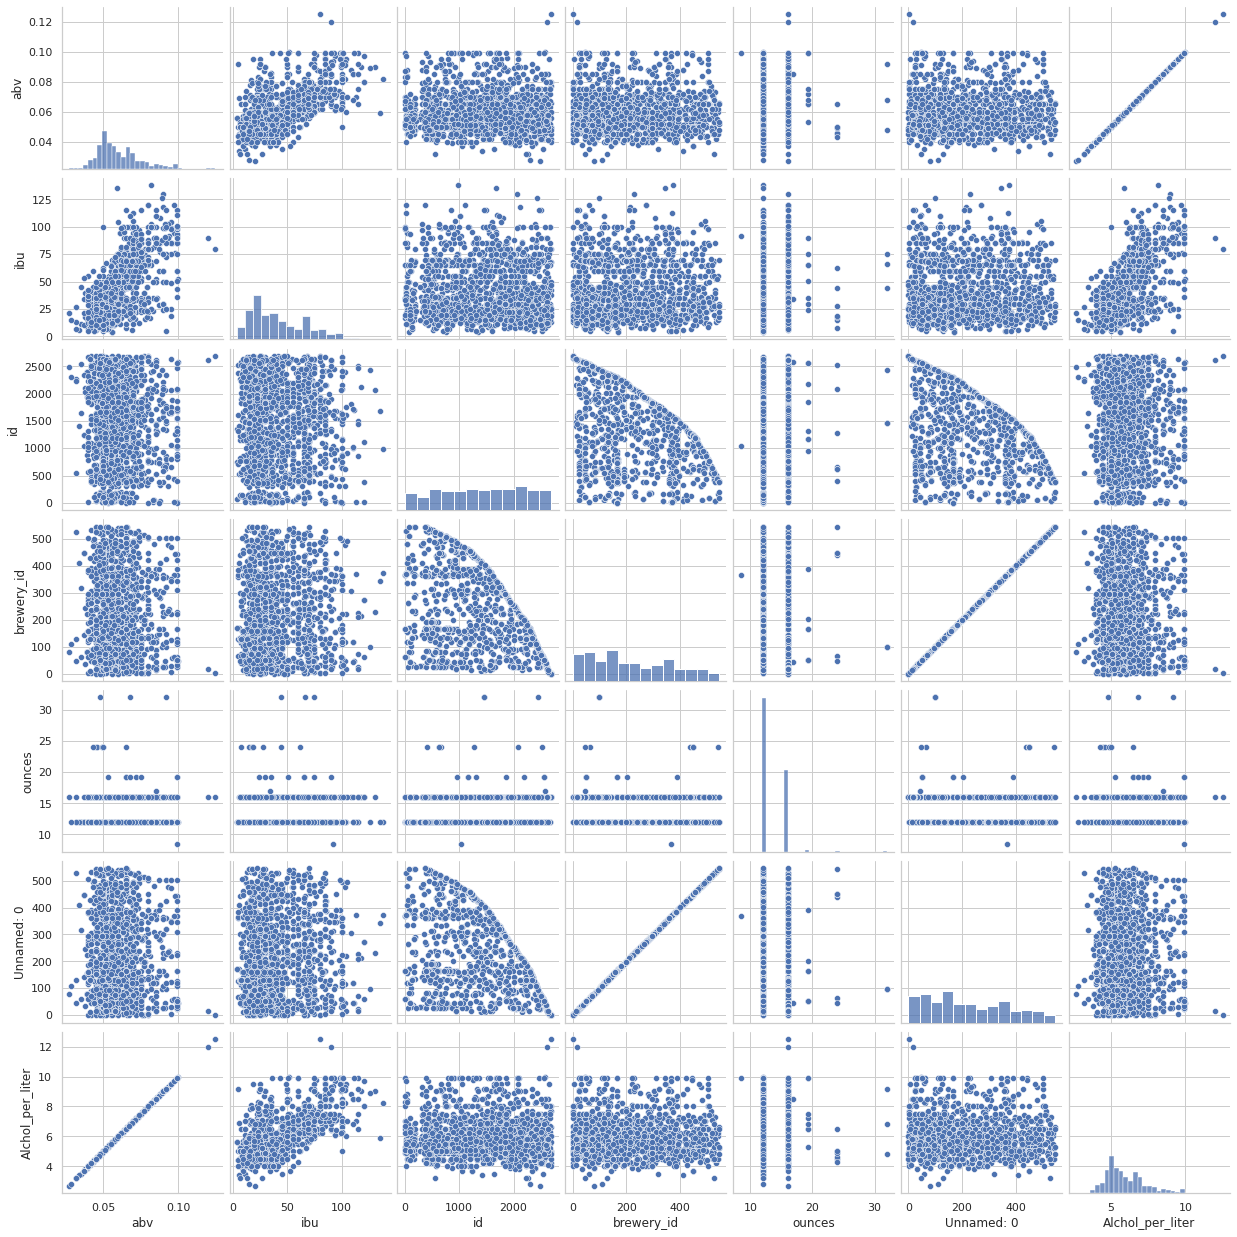

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid', context='notebook')
sns.pairplot(df, height=2.5)
plt.show()

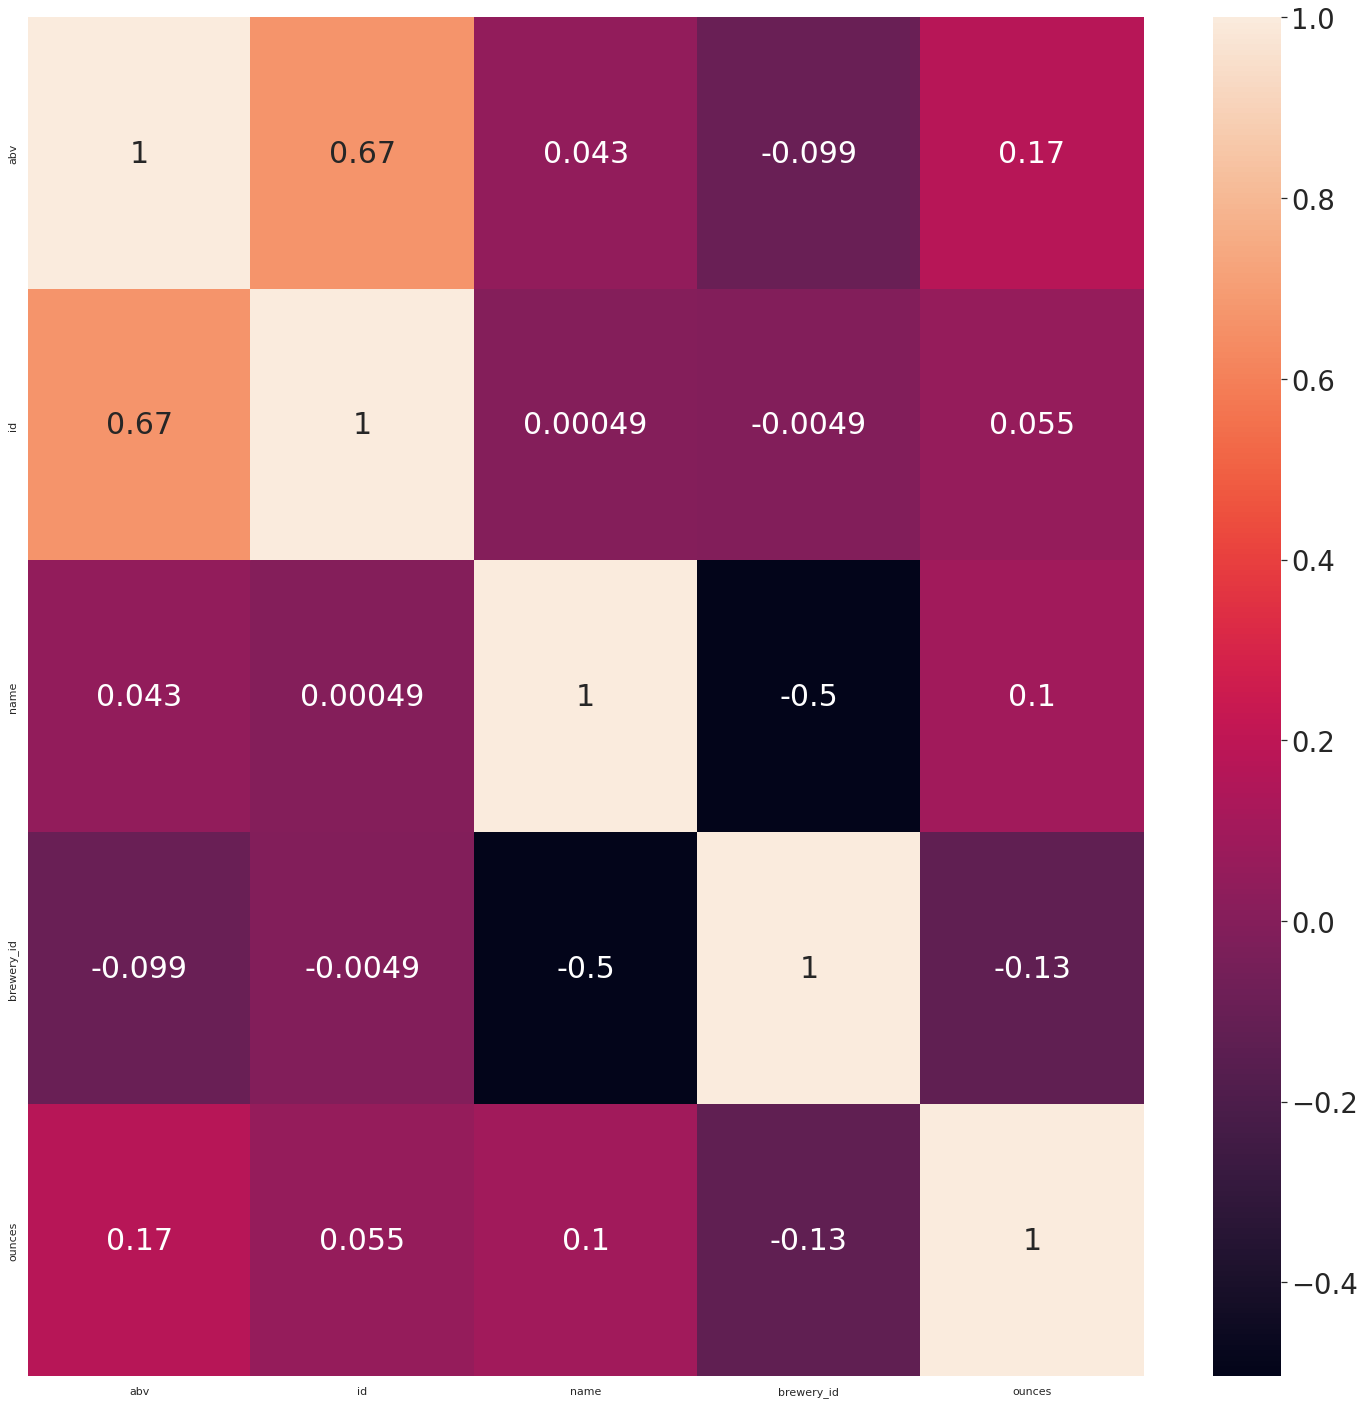

In [11]:
import numpy as np
import matplotlib.pyplot as plt

cols = ['abv','id','name','brewery_id','ounces']
fig, ax = plt.subplots(figsize=(25,25))   
cm = data.corr()
sns.set(font_scale=2.5)
sns.heatmap(cm, cbar=True, annot=True,yticklabels=cols,xticklabels=cols)

Text(0, 0.5, 'Alchol_per_liter')

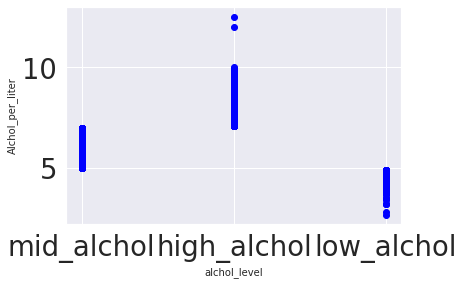

In [12]:
plt.scatter(df['alchol_level'], df['Alchol_per_liter'], c = 'blue')
plt.xlabel('alchol_level', fontsize = 10)
plt.ylabel('Alchol_per_liter', fontsize = 10)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1403 entries, 14 to 2408
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   abv               1403 non-null   float64
 1   ibu               1403 non-null   float64
 2   id                1403 non-null   int64  
 3   name_x            1403 non-null   object 
 4   style             1403 non-null   object 
 5   brewery_id        1403 non-null   int64  
 6   ounces            1403 non-null   float64
 7   Unnamed: 0        1403 non-null   int64  
 8   name_y            1403 non-null   object 
 9   city              1403 non-null   object 
 10  state             1403 non-null   object 
 11  Alchol_per_liter  1403 non-null   float64
 12  alchol_level      1403 non-null   object 
dtypes: float64(4), int64(3), object(6)
memory usage: 185.7+ KB


In [14]:
order_df = df.groupby(['state'])['Alchol_per_liter','ibu','ounces'].mean()
order_df=order_df.sort_values(by=['Alchol_per_liter'], ascending=False) 

pd.DataFrame(order_df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Alchol_per_liter,ibu,ounces
state,,,
DC,6.500000,55.250000,12.000000
CO,6.483562,47.431507,13.145205
KY,6.457143,40.714286,16.000000
NC,6.393333,43.300000,13.440000
CT,6.383333,40.833333,12.666667
IN,6.376923,42.989011,15.692308
CA,6.288889,46.281481,14.195556
FL,6.283784,46.756757,12.108108
NM,6.233333,57.000000,13.333333


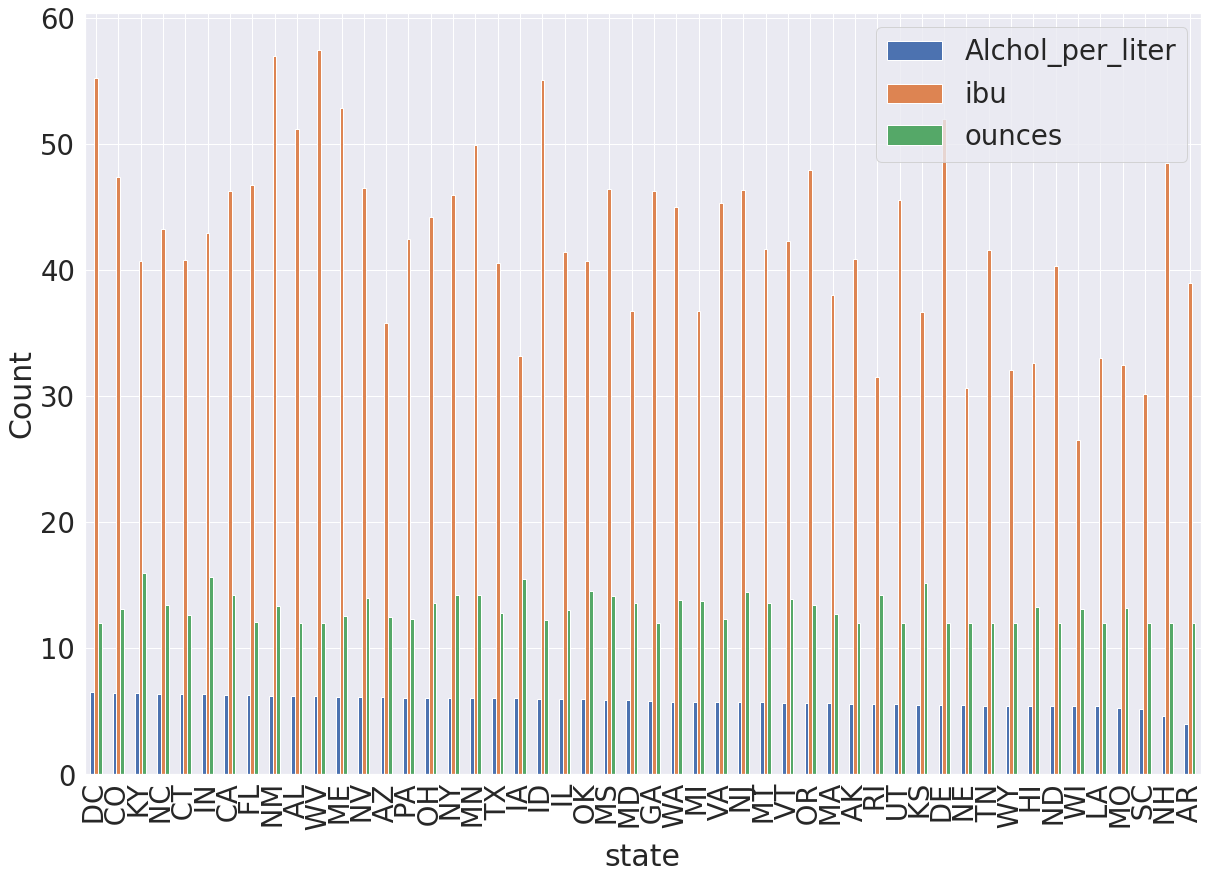

In [15]:
ax = (order_df).plot(
kind='bar',
figsize=(20, 14),
grid=True
)
ax.set_ylabel('Count')
plt.show()

In [16]:
order_df = df.groupby(['alchol_level'])['Alchol_per_liter','ibu','ounces'].mean()
order_df=order_df.sort_values(by=['Alchol_per_liter'], ascending=True) 

pd.DataFrame(order_df)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Alchol_per_liter,ibu,ounces
alchol_level,,,
low_alchol,4.474545,23.498182,13.280000
mid_alchol,5.817560,40.974914,13.414823
high_alchol,8.263347,69.988048,14.096016


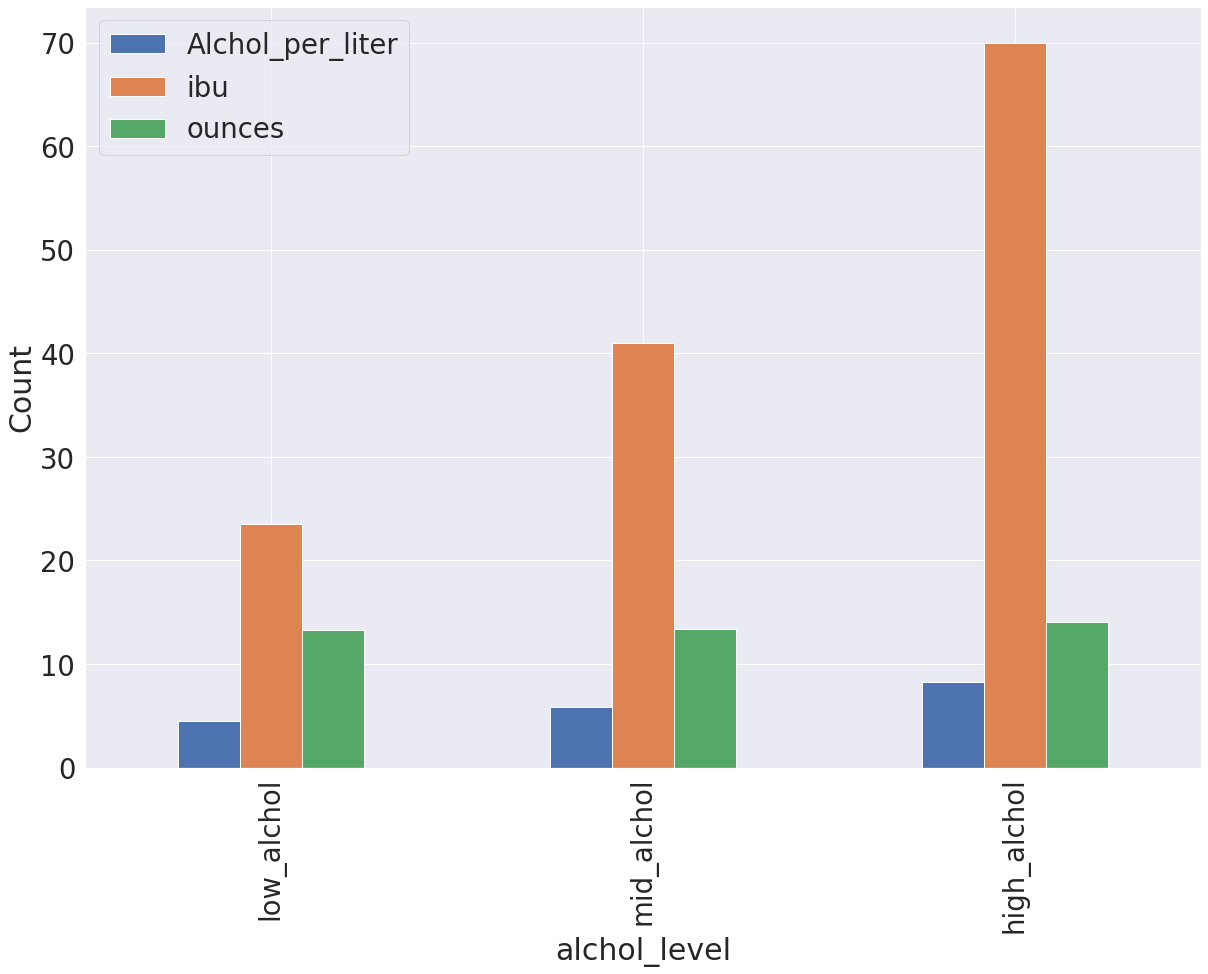

In [17]:
ax = (order_df).plot(
kind='bar',
figsize=(20, 14),
grid=True
)
ax.set_ylabel('Count')
plt.show()

#Machine learning, no supervised

In [24]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1403 entries, 14 to 2408
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   abv               1403 non-null   float64
 1   ibu               1403 non-null   float64
 2   id                1403 non-null   int64  
 3   name_x            1403 non-null   object 
 4   style             1403 non-null   object 
 5   brewery_id        1403 non-null   int64  
 6   ounces            1403 non-null   float64
 7   Unnamed: 0        1403 non-null   int64  
 8   name_y            1403 non-null   object 
 9   city              1403 non-null   object 
 10  state             1403 non-null   object 
 11  Alchol_per_liter  1403 non-null   float64
 12  alchol_level      1403 non-null   object 
dtypes: float64(4), int64(3), object(6)
memory usage: 185.7+ KB


In [118]:
x = pd.DataFrame(df, columns = ['Alchol_per_liter','ibu'])
X = StandardScaler().fit_transform(x)



In [135]:
#Set number of clusters at initialisation time
k_means = KMeans(n_clusters=2, max_iter = 1000)
model = k_means.fit(X)
model
#Generate cluster predictions and store in y_hat
y_pred = k_means.predict(X)

In [136]:
labels = k_means.labels_
metrics.silhouette_score(X, labels, metric = 'euclidean')

0.5493366564917638

In [137]:
metrics.calinski_harabasz_score(X, labels)

2142.718582628423

In [138]:
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    k_means = KMeans(n_clusters=k)
    model = k_means.fit(X)
    sum_of_squared_distances.append(k_means.inertia_)

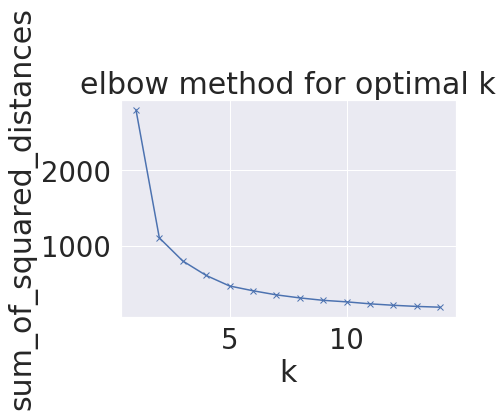

In [139]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('elbow method for optimal k')
plt.show()

In [143]:
x['y_pred'] = y_pred
x

,Alchol_per_liter,ibu,y_pred
14,6.1,60.0,1
21,9.9,92.0,1
22,7.9,45.0,1
24,4.4,42.0,0
25,4.9,17.0,0
...,...,...,...
2398,7.7,30.0,1
2399,6.9,69.0,1
2400,6.0,50.0,0
2405,6.7,45.0,1


Text(0, 0.5, 'ibu')

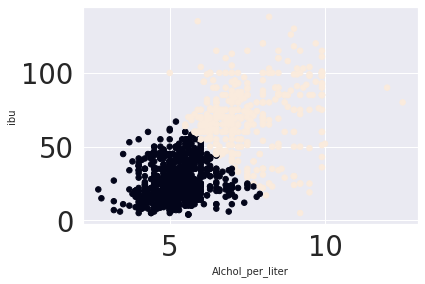

In [142]:
plt.scatter(x['Alchol_per_liter'], x['ibu'], c= y_pred, s = 30)
plt.xlabel('Alchol_per_liter', fontsize = 10)
plt.ylabel('ibu', fontsize = 10)